In [1]:
import pandas as pd

# Đọc file CSV 
file_path = 'insurance.csv'
insurance_data = pd.read_csv(file_path)

# Hiển thị tổng số dòng của dataset
tong_dong = insurance_data.shape[0] # 0 la dòng
tong_cot = insurance_data.shape[1] # 1 là cột
print("Tổng số dòng của dataset:", tong_dong)
print("Tổng số cột của dataset:", tong_cot)

Tổng số dòng của dataset: 1338
Tổng số cột của dataset: 7


In [2]:
# Kiểm tra giá trị null 
sum_giaTriNull = insurance_data.isnull().sum()
print(sum_giaTriNull)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [3]:
# Đếm số lượng giá trị unique
sum_giaTriUnique = insurance_data.nunique()
print(sum_giaTriUnique)

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [4]:
kieu_du_lieu = insurance_data.dtypes
print("\nKiểu dữ liệu của mỗi cột:\n", kieu_du_lieu)

# Tạo 1 dictionary lưu trữ kết quả phân tích của các cột kiểu nhị phân hoặc và rời rạc
phanTich = {}
for column in insurance_data.columns:
    if kieu_du_lieu[column] == 'object':
        counts = insurance_data[column].value_counts()
        phanTram = insurance_data[column].value_counts(normalize=True) * 100
        giatri_mode = insurance_data[column].mode()[0] #0 la lay gia tri cua cac dòng
        phanTich[column] = {
            'Số lượng': counts,
            'Phần trăm': phanTram,
            'Giá trị mode': giatri_mode
        }

print("\nPhân tích các cột kiểu nhị phân hoặc rời rạc:")
for cot, giaTri in phanTich.items():
    print(f"\nCột {cot}:")
    print("Giá trị:\n", giaTri['Số lượng'])
    print("Tỷ lệ phần trăm:\n", giaTri['Phần trăm'])
    print("Mode: ", giaTri['Giá trị mode'])


Kiểu dữ liệu của mỗi cột:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Phân tích các cột kiểu nhị phân hoặc rời rạc:

Cột sex:
Giá trị:
 sex
male      676
female    662
Name: count, dtype: int64
Tỷ lệ phần trăm:
 sex
male      50.523169
female    49.476831
Name: proportion, dtype: float64
Mode:  male

Cột smoker:
Giá trị:
 smoker
no     1064
yes     274
Name: count, dtype: int64
Tỷ lệ phần trăm:
 smoker
no     79.521674
yes    20.478326
Name: proportion, dtype: float64
Mode:  no

Cột region:
Giá trị:
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
Tỷ lệ phần trăm:
 region
southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: proportion, dtype: float64
Mode:  southeast


In [10]:
# Tính các giá trị thống kê cho các thuộc tính kiểu số
thuoc_tinh_so = insurance_data.select_dtypes(include=['int64', 'float64']).columns
thong_ke = insurance_data[thuoc_tinh_so].describe()

# Thêm median và midrange vào 
for cot in thuoc_tinh_so:
    median = insurance_data[cot].median()
    midrange = (insurance_data[cot].max() + insurance_data[column].min()) / 2
    mode = insurance_data[cot].mode()[0]
    thong_ke.loc['median', cot] = median
    thong_ke.loc['midrange', cot] = midrange
    thong_ke.loc['mode', cot] = mode

print("\nCác giá trị thống kê cho các thuộc tính kiểu số:\n", thong_ke)


Các giá trị thống kê cho các thuộc tính kiểu số:
                   age          bmi     children       charges
count     1338.000000  1338.000000  1338.000000   1338.000000
mean        39.207025    30.663397     1.094918  13270.422265
std         14.049960     6.098187     1.205493  12110.011237
min         18.000000    15.960000     0.000000   1121.873900
25%         27.000000    26.296250     0.000000   4740.287150
50%         39.000000    30.400000     1.000000   9382.033000
75%         51.000000    34.693750     2.000000  16639.912515
max         64.000000    53.130000     5.000000  63770.428010
median      39.000000    30.400000     1.000000   9382.033000
midrange   592.936950   587.501950   563.436950  32446.150955
mode        18.000000    32.300000     0.000000   1639.563100


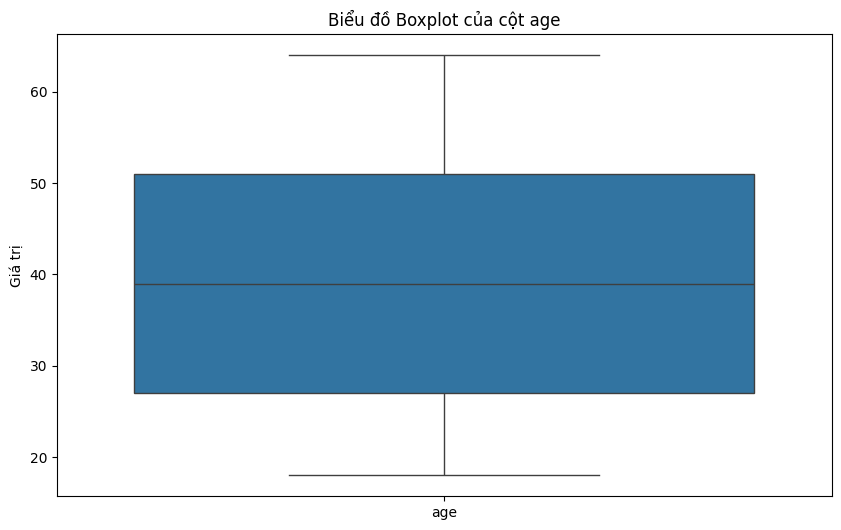

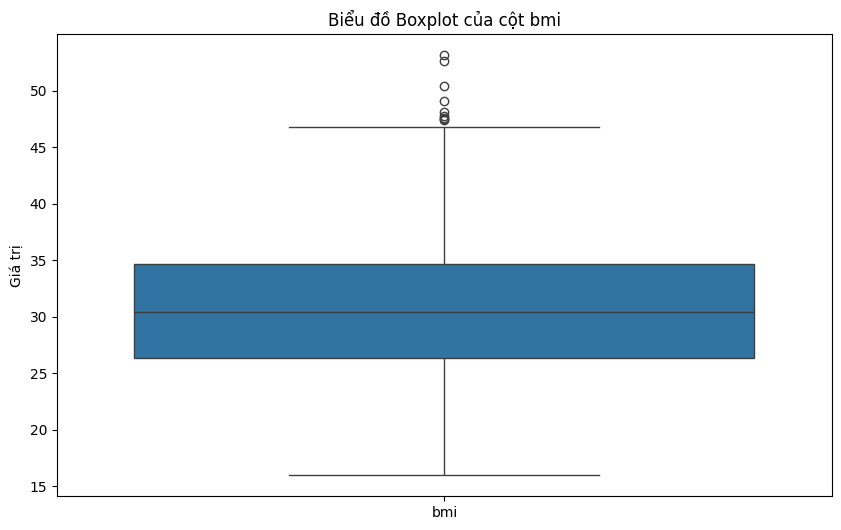

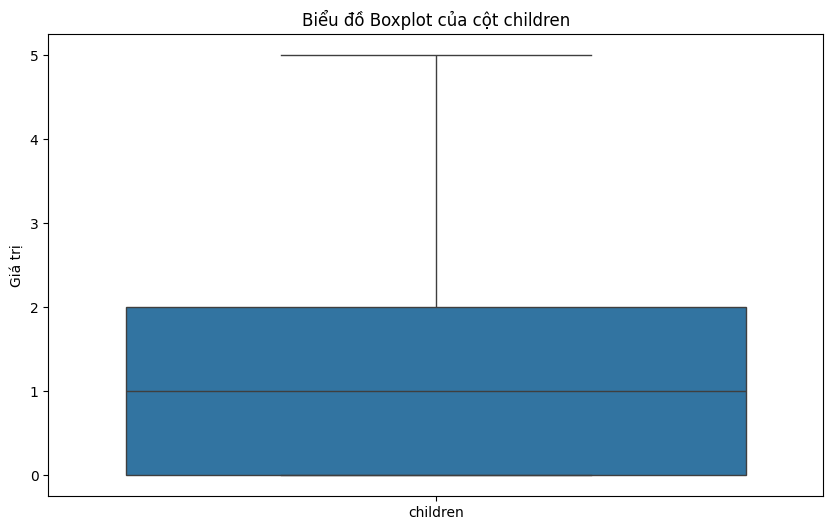

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chọn ra cột age
cot = ['age']
cot = insurance_data[cot]
# Vẽ biểu đồ boxplot
plt.figure(figsize=(10, 6)) #10 là chiều rộng 10 inch 
sns.boxplot(data=cot)
plt.title('Biểu đồ Boxplot của cột age')
plt.ylabel('Giá trị')
plt.show()


# Chọn ra cột bmi
cot_1 = ['bmi']
cot_1 = insurance_data[cot_1]
# Vẽ biểu đồ boxplot
plt.figure(figsize=(10, 6)) #10 là chiều rộng 10 inch 
sns.boxplot(data=cot_1)
plt.title('Biểu đồ Boxplot của cột bmi')
plt.ylabel('Giá trị')
plt.show()


# Chọn ra cột children
cot_2 = ['children']
cot_2 = insurance_data[cot_2]
# Vẽ biểu đồ boxplot
plt.figure(figsize=(10, 6)) #10 là chiều rộng 10 inch 
sns.boxplot(data=cot_2)
plt.title('Biểu đồ Boxplot của cột children')
plt.ylabel('Giá trị')
plt.show()

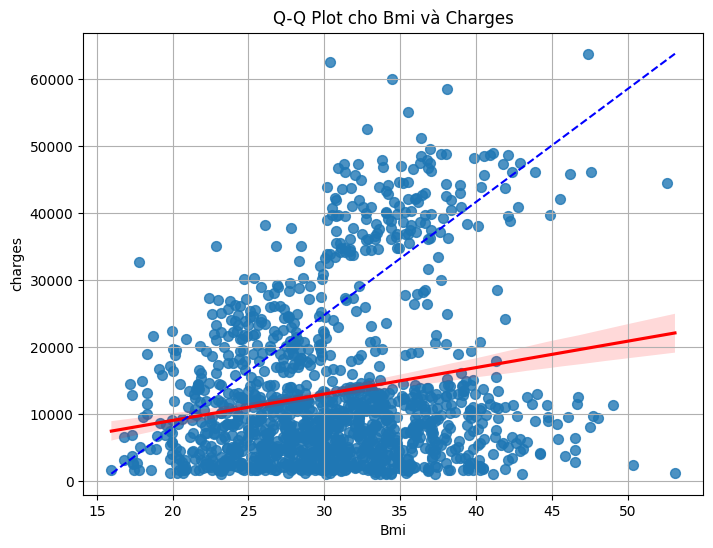

In [7]:
from matplotlib import pyplot as plt
# Vẽ Q-Q Plot với trục y là 'charges' và trục x là 'bmi' 
plt.figure(figsize=(8, 6))

#fig_reg là đường hồi quy, scatter_kws là kích thước của các điểm -> 50, line_kws -> màu của đường hồi quy
sns.regplot(x='bmi', y='charges', data=insurance_data, fit_reg=True, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Vẽ trendline
plt.plot([insurance_data['bmi'].min(), insurance_data['bmi'].max()], [insurance_data['charges'].min(), insurance_data['charges'].max()], color='blue', linestyle='--')


plt.title('Q-Q Plot cho Bmi và Charges')
plt.xlabel('Bmi')
plt.ylabel('charges')

# Hiển thị biểu đồ
plt.grid(True)
plt.show()

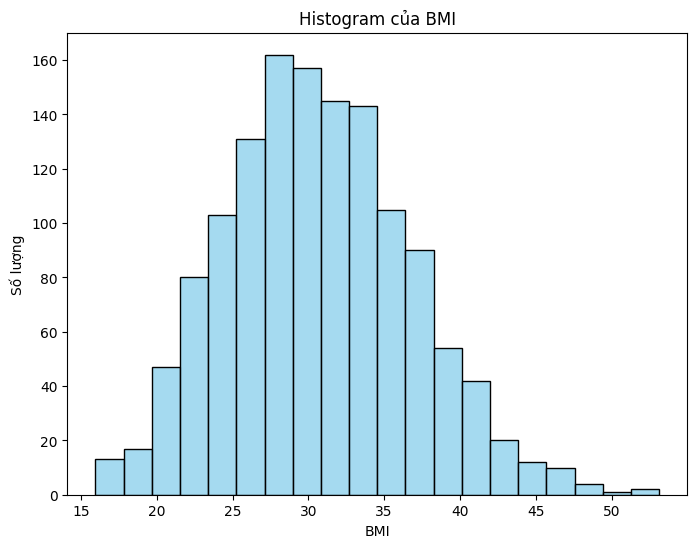

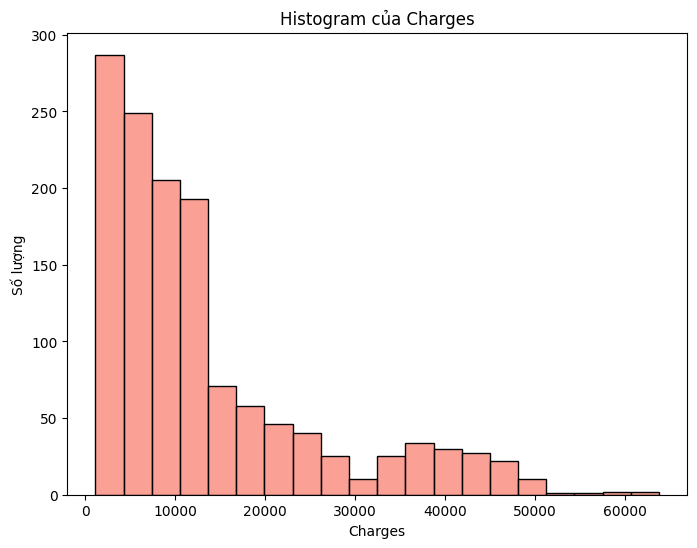

In [8]:
import seaborn as sns

# Vẽ biểu đồ histogram cho thuộc tính bmi
plt.figure(figsize=(8, 6))
sns.histplot(insurance_data['bmi'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram của BMI')
plt.xlabel('BMI')
plt.ylabel('Số lượng')
plt.show()

# Vẽ biểu đồ histogram cho thuộc tính charges
plt.figure(figsize=(8, 6))
sns.histplot(insurance_data['charges'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram của Charges')
plt.xlabel('Charges')
plt.ylabel('Số lượng')
plt.show()

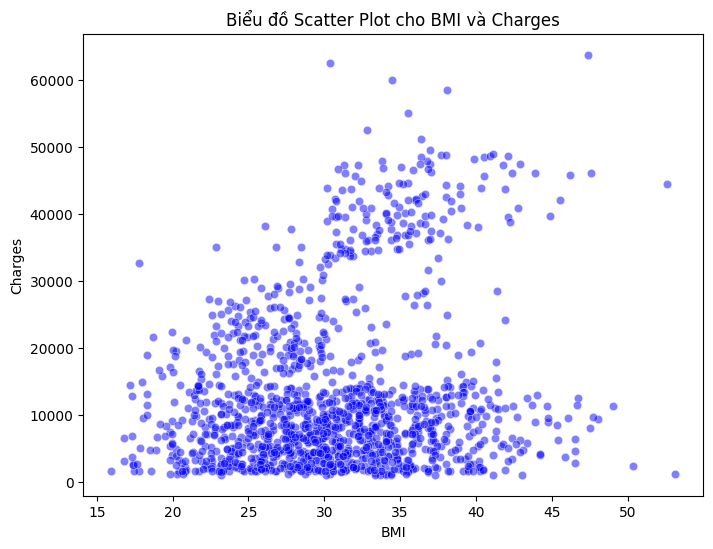

In [9]:
import seaborn as sns

# Vẽ biểu đồ Scatter Plot cho thuộc tính bmi và charges
plt.figure(figsize=(8, 6))
sns.scatterplot(data=insurance_data, x='bmi', y='charges', color='blue', alpha=0.5)
plt.title('Biểu đồ Scatter Plot cho BMI và Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

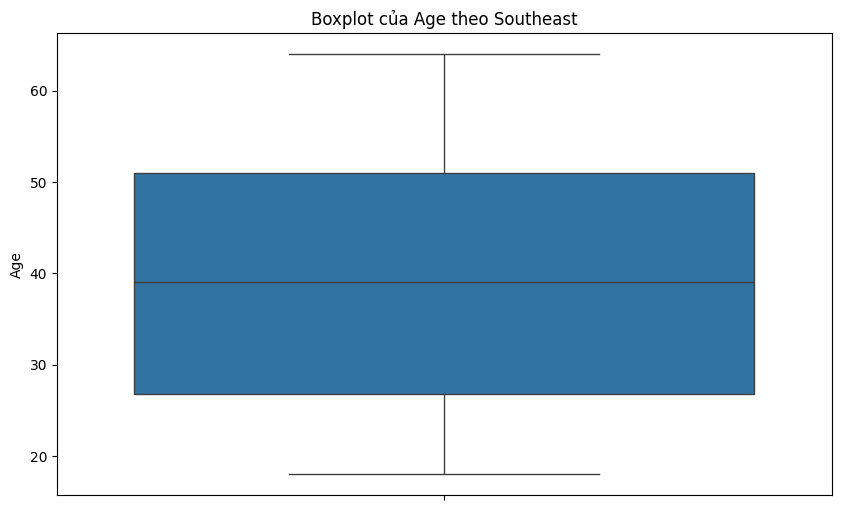

In [11]:
#Nhóm dữ liệu theo thuộc tính danh nghĩa
gia_tri_region = 'southeast'
loc_du_lieu = insurance_data[insurance_data['region'] == gia_tri_region]

# Vẽ boxplot cho thuộc tính 'age' cho giá trị 'southeast'
plt.figure(figsize=(10, 6))
sns.boxplot(y='age', data=loc_du_lieu)
plt.title(f'Boxplot của Age theo {gia_tri_region.capitalize()}')
plt.ylabel('Age')
plt.show()

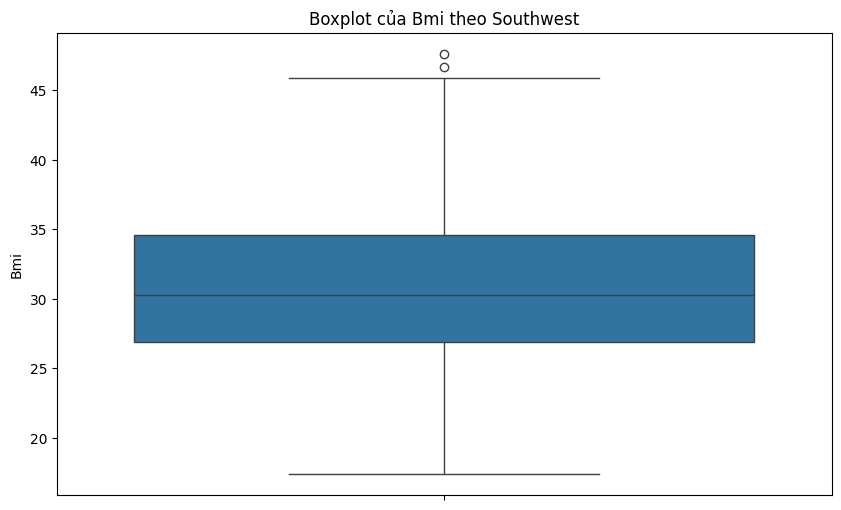

In [12]:
gia_tri_region1 = 'southwest'
loc_du_lieu1 = insurance_data[insurance_data['region'] == gia_tri_region1]

# Vẽ boxplot cho thuộc tính 'age' cho giá trị 'southeast'
plt.figure(figsize=(10, 6))
sns.boxplot(y='bmi', data=loc_du_lieu1)
plt.title(f'Boxplot của Bmi theo {gia_tri_region1.capitalize()}')
plt.ylabel('Bmi')
plt.show()

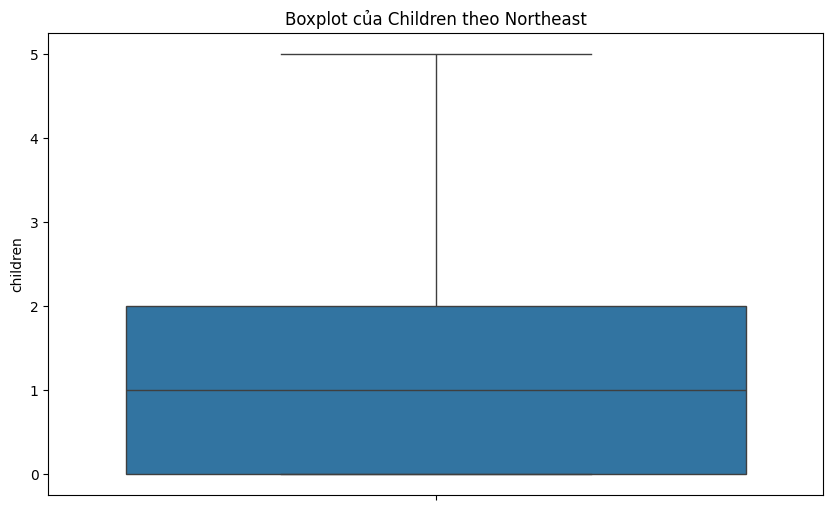

In [13]:
gia_tri_region2 = 'northeast'
loc_du_lieu2 = insurance_data[insurance_data['region'] == gia_tri_region2]

# Vẽ boxplot cho thuộc tính 'age' cho giá trị 'southeast'
plt.figure(figsize=(10, 6))
sns.boxplot(y='children', data=loc_du_lieu2)
plt.title(f'Boxplot của Children theo {gia_tri_region2.capitalize()}')
plt.ylabel('children')
plt.show()

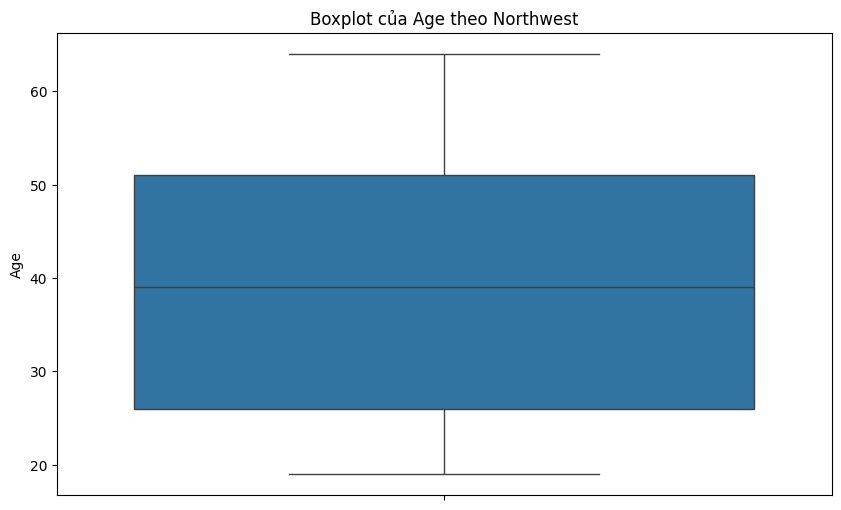

In [14]:
gia_tri_region3 = 'northwest'
loc_du_lieu3 = insurance_data[insurance_data['region'] == gia_tri_region3]

# Vẽ boxplot cho thuộc tính 'age' cho giá trị 'southeast'
plt.figure(figsize=(10, 6))
sns.boxplot(y='age', data=loc_du_lieu3)
plt.title(f'Boxplot của Age theo {gia_tri_region3.capitalize()}')
plt.ylabel('Age')
plt.show()

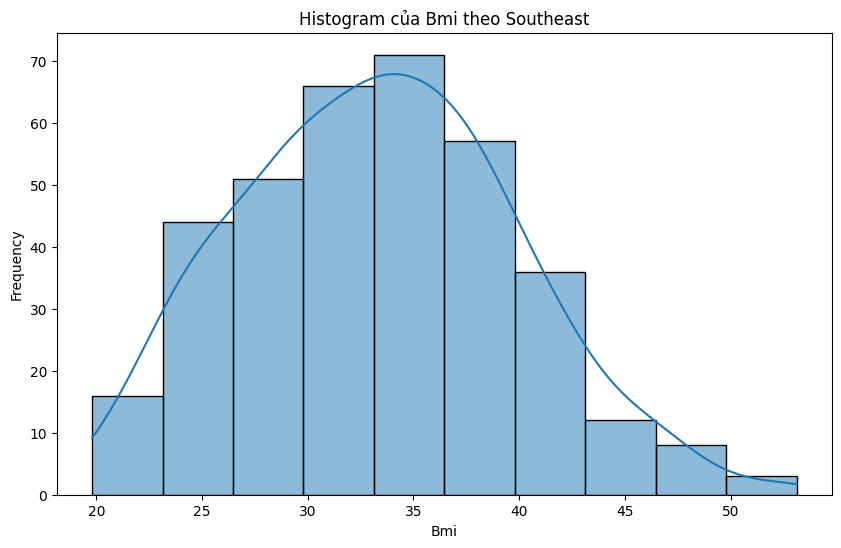

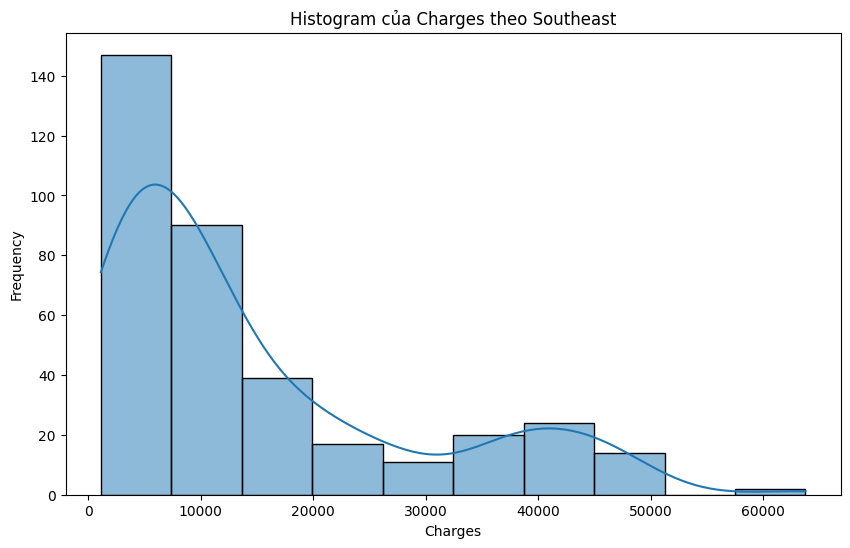

In [15]:
gia_tri_region4 = 'southeast'
loc_du_lieu4 = insurance_data[insurance_data['region'] == gia_tri_region4]

# Vẽ biểu đồ Histogram cho thuộc tính 'age' cho giá trị 'southeast'
plt.figure(figsize=(10, 6))
sns.histplot(loc_du_lieu4['bmi'], bins=10, kde=True)
plt.title(f'Histogram của Bmi theo {gia_tri_region4.capitalize()}')
plt.xlabel('Bmi')
plt.ylabel('Frequency')
plt.show()

# Vẽ biểu đồ Histogram cho thuộc tính 'bmi' cho giá trị 'southeast'
plt.figure(figsize=(10, 6))
sns.histplot(loc_du_lieu4['charges'], bins=10, kde=True)
plt.title(f'Histogram của Charges theo {gia_tri_region4.capitalize()}')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

Ma trận tương quan:
           0         1         2         3
0  1.000000  0.994393  0.983882  0.993578
1  0.994393  1.000000  0.996885  0.997393
2  0.983882  0.996885  1.000000  0.995643
3  0.993578  0.997393  0.995643  1.000000

Độ đo cosin:
           0         1         2         3
0  1.000000  0.996080  0.989387  0.990696
1  0.996080  1.000000  0.997916  0.995257
2  0.989387  0.997916  1.000000  0.993502
3  0.990696  0.995257  0.993502  1.000000


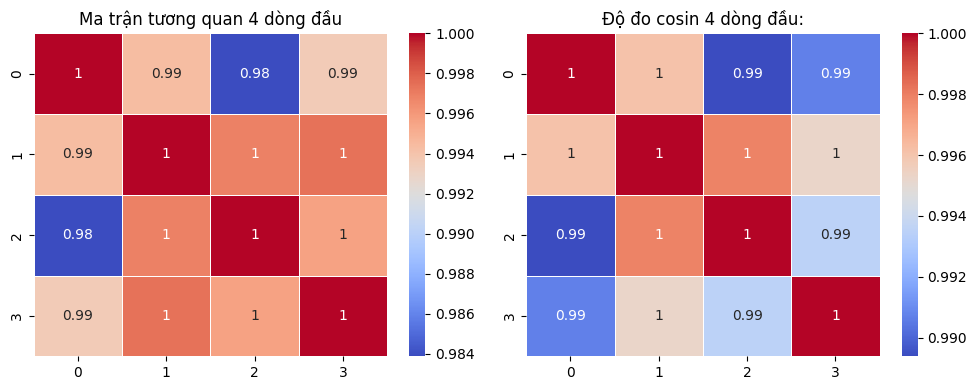

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
file_path = 'insurance.csv'
insurance_data = pd.read_csv(file_path)

# Chọn các cột quan trọng
selected_columns = ['age', 'children', 'region', 'smoker']
insurance_data = insurance_data[selected_columns]

# Chuyển các biến phân loại thành dạng số
insurance_data['smoker'] = insurance_data['smoker'].map({'yes': 1, 'no': 0})
insurance_data['region'] = insurance_data['region'].astype('category').cat.codes

# Lấy 4 dòng đầu tiên
subset_data = insurance_data.head(4)

# Tính toán ma trận tương quan giữa các dòng, T là đảo chiều cột sang dòng
correlation_matrix = subset_data.T.corr()

# Tính toán ma trận độ đo cosin giữa các dòng
cosine_matrix = cosine_similarity(subset_data)

# Tạo DataFrame từ ma trận độ đo cosin
cosine_df = pd.DataFrame(cosine_matrix, index=subset_data.index, columns=subset_data.index)

# In ra ma trận tương quan và ma trận độ đo cosin
print("Ma trận tương quan:\n", correlation_matrix)
print("\nĐộ đo cosin:\n", cosine_df)

# Vẽ ma trận tương quan
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Ma trận tương quan 4 dòng đầu')

# Vẽ ma trận độ đo cosin
plt.subplot(1, 2, 2)
sns.heatmap(cosine_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Độ đo cosin 4 dòng đầu:')

plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

#  Đọc dữ liệu
file_path = 'insurance.csv'
df = pd.read_csv(file_path)

# Chuyển đổi các giá trị của cột age
def convert_age(age):
    if 18 <= age <= 34:
        return 'Youth'
    elif 35 <= age <= 49:
        return 'Middle-aged'
    elif 50 <= age <= 64:
        return 'Senior'

df['age'] = df['age'].apply(convert_age)

#  Chuyển đổi các giá trị của cột bmi
def convert_bmi(bmi):
    if 15.96 <= bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    elif 30 <= bmi < 34.9:
        return 'Obesity I'
    elif 35 <= bmi < 39.9:
        return 'Obesity II'
    elif bmi >= 40:
        return 'Obesity III'

df['bmi'] = df['bmi'].apply(convert_bmi)

# Chuyển đổi các giá trị của cột charges
def convert_charges(charges):
    if 0 <= charges < 5000:
        return 'Very Low'
    elif 5000 <= charges < 10000:
        return 'Low'
    elif 10000 <= charges < 20000:
        return 'Medium'
    elif 20000 <= charges < 40000:
        return 'High'
    else:
        return 'Very High'

df['charges'] = df['charges'].apply(convert_charges)

# Chuyển đổi các biến danh nghĩa thành số 
le_age = LabelEncoder()
le_sex = LabelEncoder()
le_bmi = LabelEncoder()
le_region = LabelEncoder()
le_charges = LabelEncoder()
le_smoker = LabelEncoder()


df['age'] = le_age.fit_transform(df['age'])
df['sex'] = le_sex.fit_transform(df['sex'])
df['bmi'] = le_bmi.fit_transform(df['bmi'])
df['region'] = le_region.fit_transform(df['region'])
df['charges'] = le_charges.fit_transform(df['charges'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])

# Chuẩn bị dữ liệu đầu vào và đầu ra cho mô hình
X = df[['age', 'sex', 'bmi', 'children', 'region', 'charges']]
y = df['smoker']

# Huấn luyện mô hình Naive Bayes
model = GaussianNB()
model.fit(X, y)

# Dữ liệu đầu vào cho dự đoán
input_data = {
    'age': 'Senior',
    'sex': 'male',
    'bmi': 'Obesity II',
    'children': 4,
    'region': 'southeast',
    'charges': 'Medium'
}

# Chuyển đổi dữ liệu đầu vào
chuyen_input_data = [
    le_age.transform([input_data['age']])[0],
    le_sex.transform([input_data['sex']])[0],
    le_bmi.transform([input_data['bmi']])[0],
    input_data['children'],
    le_region.transform([input_data['region']])[0],
    le_charges.transform([input_data['charges']])[0]
]

# Chuyển đổi dữ liệu đầu vào thành DataFrame với tên các cột hợp lệ
chuyen_input_data_df = pd.DataFrame([chuyen_input_data], columns=X.columns)

# Dự đoán nhãn smoker
du_doan = model.predict(chuyen_input_data_df)
nhan_du_doan = le_smoker.inverse_transform(du_doan)[0] # [0] lấy phần tử đầu tiên của mảng kết quả sau khi áp dụng inverse_transform

# In kết quả dự đoán
print('Nhãn smoker được dụ đoán cho input X = (age = Senior , sex = male , bmi = Obesity II, children = 4 , region = southeast, charges = Medium) là: ',nhan_du_doan)


Nhãn smoker được dụ đoán cho input X = (age = Senior , sex = male , bmi = Obesity II, children = 4 , region = southeast, charges = Medium) là:  no


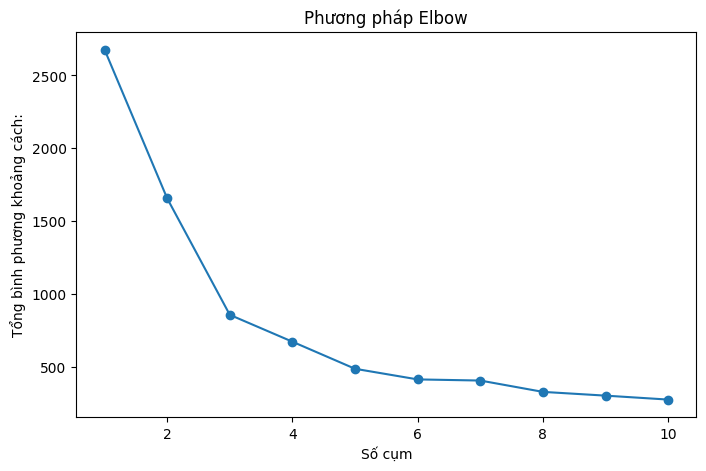

        bmi   charges  cluster
0 -0.453320  0.298584        0
1  0.509621 -0.953689        2
2  0.383307 -0.728675        2
3 -1.305531  0.719843        0
4 -0.292556 -0.776802        0


C:\Users\PC\AppData\Local\Temp\ipykernel_19216\3571937325.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data['bmi'], cluster_data['charges'], label=f'Cluster {cluster}', cmap='viridis')


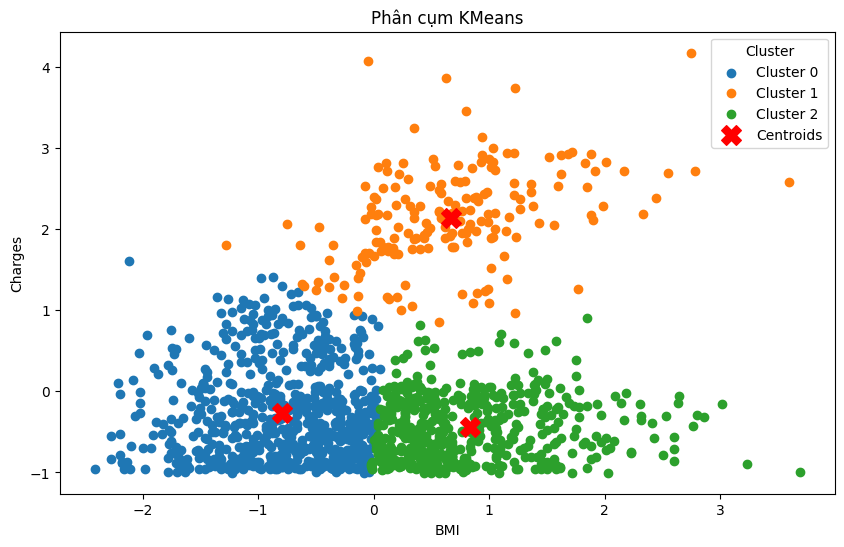

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv('insurance.csv')

# Chuyển đổi các cột danh nghĩa và nhị nhân thành số
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

# Lấy các cột cần chuẩn hóa
data_to_scale = df[['bmi', 'charges']]

# Chuẩn hóa dữ liệu
sc = StandardScaler()
data_stand = sc.fit_transform(data_to_scale)

# Chuyển đổi dữ liệu đã chuẩn hóa thành dataframe
data_stand = pd.DataFrame(data_stand, columns=['bmi', 'charges'])

# Tìm số cụm thích hợp bằng phương pháp "elbow"
tong_binh_phuong_kc = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_stand)
    tong_binh_phuong_kc.append(kmeans.inertia_)

# Vẽ biểu đồ "elbow"
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), tong_binh_phuong_kc, marker='o')
plt.title('Phương pháp Elbow')
plt.xlabel('Số cụm')
plt.ylabel('Tổng bình phương khoảng cách:')
plt.show()

# Chọn số cụm (ví dụ k=3) và phân cụm dữ liệu
kmeans = KMeans(n_clusters=3, random_state=42)
data_stand['cluster'] = kmeans.fit_predict(data_stand)

# Hiển thị kết quả phân cụm
print(data_stand.head())

# Biểu thị các cụm lên bằng biểu đồ scatter
plt.figure(figsize=(10, 6))

# Tạo các mảng tương ứng với mỗi cụm
for cluster in range(3):
    cluster_data = data_stand[data_stand['cluster'] == cluster]
    plt.scatter(cluster_data['bmi'], cluster_data['charges'], label=f'Cluster {cluster}', cmap='viridis')

# Hiển thị các tâm của các cụm
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200, label='Centroids')

plt.title('Phân cụm KMeans')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Cluster', loc='upper right')
plt.show()


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

# Đọc dữ liệu từ file
file_path = 'insurance.csv'  
data = pd.read_csv(file_path)

# Bỏ cột charges
data = data.drop('charges', axis=1)

# Chuyển đổi các cột categorical thành số
label_encoders = {}
for column in ['sex', 'region']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Chia dữ liệu thành tập train (80%) và tập test (20%) với 20% là các dòng từ cuối lên
test_size = 268
train_size = len(data) - test_size

X_train = data.iloc[:train_size].drop('smoker', axis=1)  # Các feature của tập train
y_train = data.iloc[:train_size]['smoker']  # Nhãn của tập train

X_test = data.iloc[train_size:].drop('smoker', axis=1)  # Các feature của tập test
y_test = data.iloc[train_size:]['smoker']  # Nhãn của tập test

# Huấn luyện mô hình Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Đánh giá bằng Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Hiển thị các giá trị TP, FN, FP, TN từ Confusion Matrix
tp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
tn = cm[0, 0]

cm_values = {
    "True Positives (TP)": tp,
    "False Negatives (FN)": fn,
    "False Positives (FP)": fp,
    "True Negatives (TN)": tn
}

report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nConfusion Matrix Values:")
print(cm_values)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[209   0]
 [ 59   0]]

Confusion Matrix Values:
{'True Positives (TP)': 0, 'False Negatives (FN)': 59, 'False Positives (FP)': 0, 'True Negatives (TN)': 209}

Classification Report:
              precision    recall  f1-score   support

          no       0.78      1.00      0.88       209
         yes       0.00      0.00      0.00        59

    accuracy                           0.78       268
   macro avg       0.39      0.50      0.44       268
weighted avg       0.61      0.78      0.68       268



C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r